In [17]:
import configparser
import psycopg2
import pandas as pd
from sql_queries import sql_counts
import matplotlib.pyplot as plt

In [10]:
# Retrieve Parameters from the config file (dwh.cfg)

config = configparser.ConfigParser()
config.read_file(open('dwh.cfg'))



In [11]:
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()

In [27]:
count_df = pd.DataFrame(columns=['Query', '# of Records'])

for query in sql_counts:
        cur.execute(query)
        fetch=cur.fetchall()
        count_df = count_df.append({'Query':query,'# of Records':fetch[0][0]},ignore_index=True)
        conn.commit()


count_df

,Query,# of Records
0,SELECT COUNT(*) FROM songplays;,319
1,SELECT COUNT(*) FROM songs,14896
2,SELECT COUNT(*) FROM artists;,10025
3,SELECT COUNT(*) FROM time;,6813
4,SELECT COUNT(*) FROM users;,104
5,SELECT COUNT(*) FROM staging_events;,8056
6,SELECT COUNT(*) FROM staging_songs;,14896


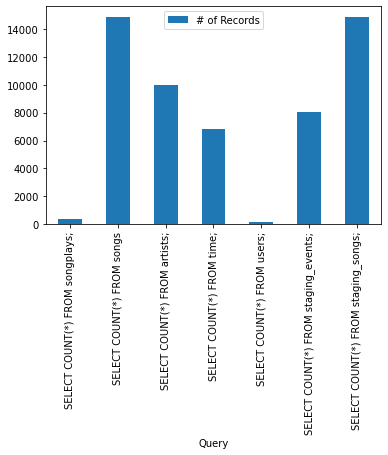

In [26]:
count_df.plot.bar(x='Query', y='# of Records')
plt.show()